In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#checking shape
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
#checking length
len(X_train), len(X_test)

(60000, 10000)

In [5]:
#accessing the shape of the image at index 0 in the training dataset
X_train[0].shape

(28, 28)

In [6]:
#accessing the shape of the image at index 5 in the training dataset
X_train[5].shape

(28, 28)

In [7]:
#display the contents of the training image at index 5
#the output is a 2D NumPy array representing the pixel values of the image.
#the array shows the intensity of each pixel, ranging from 0 (black) to 255 (white).
#each row in the array corresponds to a row of pixels in the image.
#the image appears to be a handwritten digit, and the pixel values indicate the darkness of each pixel.
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

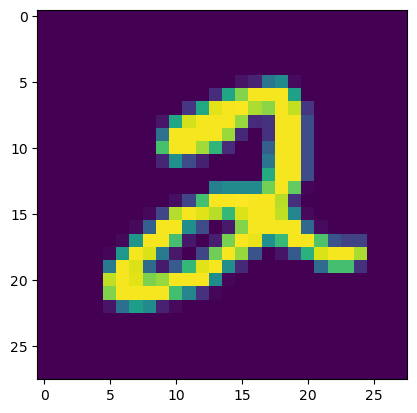

In [8]:
#displaying the training image at index 5 using matplotlib
plt.imshow(X_train[5])

In [9]:
#accessing the label of the training sample at index 5
y_train[5]

2

In [10]:
#normalizing pixel values in the training and test sets by dividing them by 255
X_train = X_train / 255

X_test = X_test / 255

In [11]:
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
#reshaping the training and test sets to flatten the 28x28 images into 1D arrays
#this step converts each 28x28 matrix representing an image into a 1D array with 784 elements.
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

In [13]:
#display the shape of the X_train dataset
X_train.shape

(60000, 784)

In [14]:
#shape of the image at index 5 in the training dataset.
X_train[5].shape

(784,)

In [15]:
#displaying the pixel values of the training image at index 5
#the array represents the intensity of each pixel in the image, ranging from 0 (black) to 1 (white).
X_train[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### ANN

In [16]:
#creating an Artificial Neural Network (ANN) model
model = keras.Sequential([
    #First layer: Dense layer with 256 units, ReLU activation function, and input shape of 784 (flattened image)
    keras.layers.Dense(256, activation = "relu", input_shape=(784,)),
    
    #Second layer: Dense layer with 128 units and ReLU activation function
    keras.layers.Dense(128, activation = "relu"),
    
    #Output layer: Dense layer with 10 units (for 10 classes) and softmax activation function
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
#summary of the ANN model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#compiling the ANN model
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [19]:
#training the ANN model
history = model.fit(X_train, y_train, batch_size = 128, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2741 - accuracy: 0.9212 - val_loss: 0.1371 - val_accuracy: 0.9612
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1063 - accuracy: 0.9684 - val_loss: 0.0942 - val_accuracy: 0.9715
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0687 - accuracy: 0.9789 - val_loss: 0.0892 - val_accuracy: 0.9708
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0793 - val_accuracy: 0.9749
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0730 - val_accuracy: 0.9772
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0756 - val_accuracy: 0.9779
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0632 - val_accuracy: 0.9810
Epoch 

In [20]:
#evaluate the performance of the trained model on the test dataset
test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9813


In [21]:
#test accuracy of the trained model on the test dataset
print("Test accuracy:", test_acc)

Test accuracy: [0.0852353423833847, 0.9812999963760376]


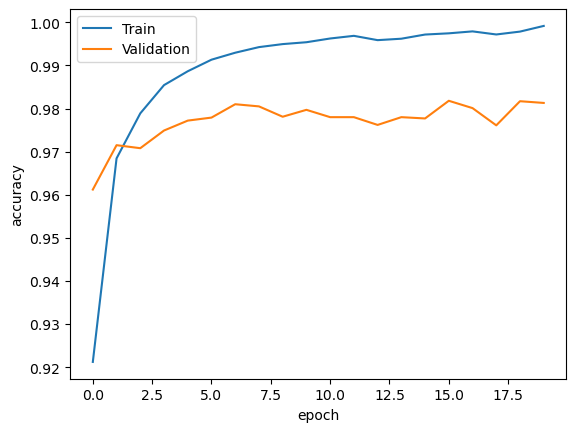

In [22]:
#plotting the training and validation accuracy over epochs

#plotting the training accuracy from the 'history' object
plt.plot(history.history["accuracy"])
#plotting the validation accuracy from the 'history' object
plt.plot(history.history["val_accuracy"])
#labeling the x-axis as 'epoch'
plt.xlabel("epoch")
#labeling the y-axis as 'accuracy'
plt.ylabel("accuracy")
#adding a legend to distinguish between training and validation accuracy
plt.legend(["Train", "Validation"])
#displaying the plot
plt.show()

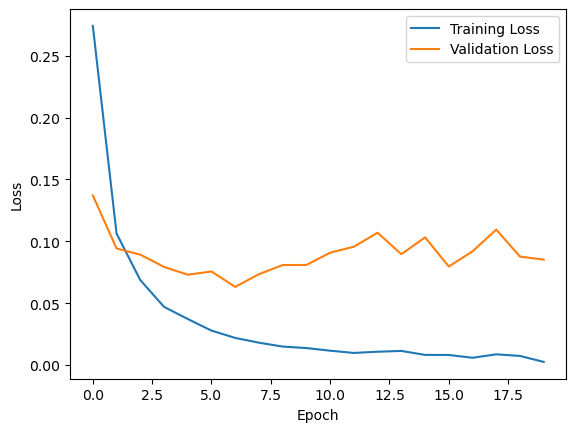

In [23]:
#plotting the training loss and validation loss over epochs
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [24]:
#predicting outputs using the trained model on the test dataset.
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[1.36131112e-16, 3.98343874e-14, 1.97273708e-12, ...,
        1.00000000e+00, 6.74830133e-14, 1.02374376e-11],
       [2.27250622e-14, 2.18202026e-10, 1.00000000e+00, ...,
        1.86749589e-17, 4.40198984e-13, 2.10839919e-24],
       [3.10610847e-12, 9.99999642e-01, 4.51519544e-10, ...,
        9.00410697e-08, 6.22659480e-09, 5.37590025e-12],
       ...,
       [5.07293029e-26, 1.74193963e-17, 1.10869486e-23, ...,
        6.28555422e-13, 2.86631317e-18, 1.93792626e-09],
       [4.33176964e-16, 6.36677797e-22, 3.57640689e-19, ...,
        1.21836550e-14, 3.99747430e-10, 1.26243570e-24],
       [9.16702929e-17, 1.85147358e-23, 4.05127455e-17, ...,
        8.32800852e-24, 3.93691494e-19, 1.13564738e-19]], dtype=float32)

In [25]:
#predicting outputs using the trained model on the test dataset.
y_predicted = model.predict(X_test)
y_predicted[7]

313/313 [==============================] - 1s 2ms/step


array([2.7351312e-14, 9.2376692e-13, 2.5191365e-09, 2.8011048e-06,
       2.2813478e-09, 1.6999577e-13, 6.2818880e-22, 1.3802542e-09,
       2.2922678e-14, 9.9999714e-01], dtype=float32)

In [26]:
#reshaping the training and test data to have a single channel (1) for grayscale images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

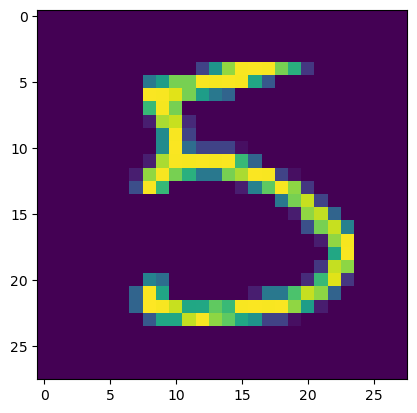

In [27]:
#displaying the image at index 15 from the test dataset
plt.imshow(X_test[15])

In [28]:
#extracting the index of the maximum value in the predicted output for the 15th sample
np.argmax(y_predicted[15])

5

In [29]:
#extracting the index of the maximum value in each predicted output and storing them in 'y_predicted_labels'
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [30]:
#displaying the predicted labels for the first 15 samples from the test dataset
y_predicted_labels[:15]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1]

In [31]:
#confusion matrix using true labels (y_test) and predicted labels (y_predicted_labels)
cmatrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [32]:
cmatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    1,    1,    1,    1,    3,    2,    1,    2,    1],
       [   0, 1127,    3,    0,    0,    0,    1,    1,    3,    0],
       [   2,    1, 1012,    4,    1,    0,    3,    6,    3,    0],
       [   0,    0,    9,  989,    0,    2,    0,    2,    0,    8],
       [   0,    0,    4,    0,  970,    0,    2,    1,    0,    5],
       [   2,    0,    0,   14,    1,  866,    3,    0,    2,    4],
       [   1,    3,    0,    1,    2,    3,  947,    1,    0,    0],
       [   0,    5,    9,    1,    1,    0,    0, 1007,    1,    4],
       [   0,    0,    3,    6,    2,    2,    2,    2,  953,    4],
       [   0,    7,    0,    2,   13,    4,    1,    4,    3,  975]])>

Text(95.72222222222221, 0.5, 'Actual')

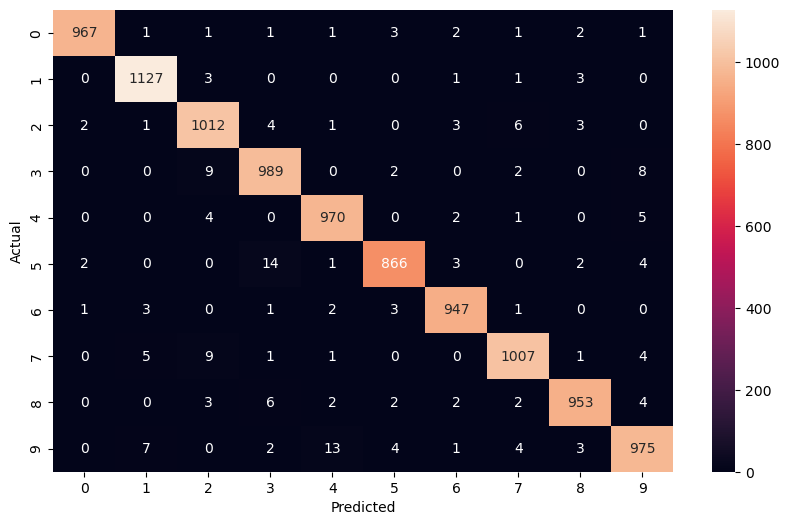

In [33]:
#heatmap to visualize the confusion matrix
plt.figure(figsize = (10,6))
sns.heatmap(cmatrix, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### CNN

In [34]:
#Creating a Convolutional Neural Network (CNN) model using Keras Sequential API
model = keras.Sequential([
    #Convolutional layer with 32 filters, each of size (3, 3), using ReLU activation function, and expecting input images of shape (28, 28, 1)
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    
    #MaxPooling layer with pool size (2, 2) to downsample the spatial dimensions
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    #Another Convolutional layer with 64 filters and (3, 3) kernel size, using ReLU activation
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    
    #Another MaxPooling layer to further downsample the spatial dimensions
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    #Flattening layer to convert the 2D output to a 1D array before feeding it to Dense layers
    layers.Flatten(),
    
    #Dense (fully connected) layer with 128 units and ReLU activation
    layers.Dense(128, activation="relu"),
    
    #Output layer with 10 units (for 10 classes) and softmax activation for multi-class classification
    layers.Dense(10, activation="softmax")
])

In [35]:
#summary of the CNN model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [36]:
#compiling the CNN model
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [37]:
#training the CNN model
history = model.fit(X_train, y_train, batch_size = 128, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
469/469 [==============================] - 20s 40ms/step - loss: 0.1946 - accuracy: 0.9427 - val_loss: 0.0687 - val_accuracy: 0.9785
Epoch 2/20
469/469 [==============================] - 19s 41ms/step - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.0409 - val_accuracy: 0.9868
Epoch 3/20
469/469 [==============================] - 24s 52ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0341 - val_accuracy: 0.9883
Epoch 4/20
469/469 [==============================] - 21s 44ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.0348 - val_accuracy: 0.9884
Epoch 5/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0279 - val_accuracy: 0.9910
Epoch 6/20
469/469 [==============================] - 21s 44ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0400 - val_accuracy: 0.9884
Epoch 7/20
469/469 [==============================] - 21s 44ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0265 - val_accuracy:

In [38]:
#evaluating the trained CNN model on the test data to obtain accuracy and loss
test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0367 - accuracy: 0.9912


In [39]:
#test accuracy obtained from evaluating the trained CNN model on the test data
print("Test accuracy:", test_acc)

Test accuracy: [0.03672655299305916, 0.9911999702453613]


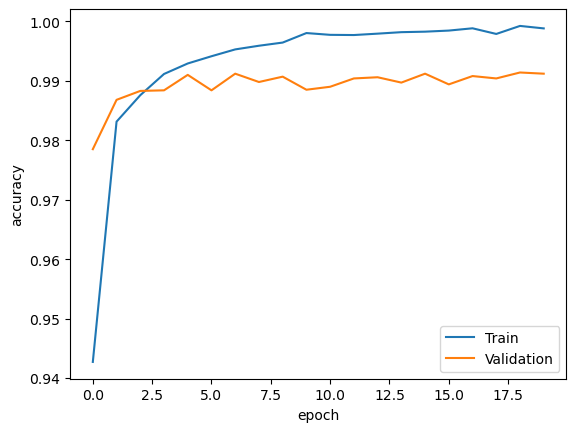

In [40]:
#plotting the training accuracy and validation accuracy over epochs
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["Train", "Validation"]) 
plt.show()

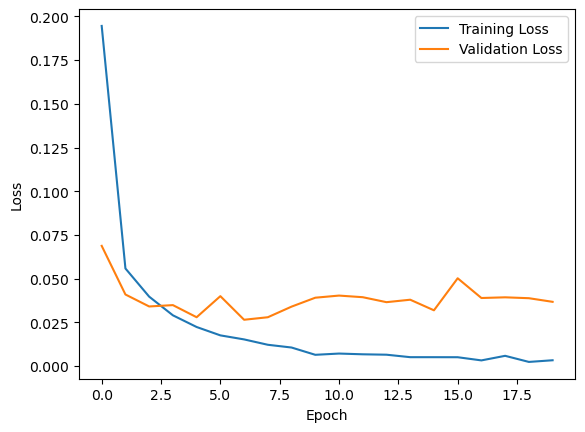

In [41]:
#plotting the training loss and validation loss over epochs
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [42]:
#predicting the class probabilities for the test data using the trained CNN model
model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


array([[1.0000269e-11, 6.2924600e-14, 6.1181821e-13, ..., 1.0000000e+00,
        4.6115238e-12, 1.9953663e-09],
       [9.2257040e-13, 7.7087176e-13, 1.0000000e+00, ..., 1.2224646e-18,
        3.8554639e-11, 5.2949398e-23],
       [6.0165539e-13, 1.0000000e+00, 8.2593692e-13, ..., 3.7866479e-09,
        1.7629016e-08, 7.6778438e-13],
       ...,
       [2.7343270e-24, 5.8609564e-18, 4.8652902e-23, ..., 9.4487355e-21,
        7.9654219e-14, 2.1015582e-16],
       [6.1890423e-13, 6.5246016e-20, 6.8897130e-23, ..., 5.3484252e-23,
        1.1817232e-06, 1.3065193e-16],
       [2.2801444e-13, 4.3866596e-17, 1.7513488e-12, ..., 2.7327243e-29,
        3.3250087e-13, 3.8397336e-20]], dtype=float32)

In [43]:
y_predicted = model.predict(X_test)
y_predicted[10]

313/313 [==============================] - 2s 7ms/step


array([1.0000000e+00, 4.0055231e-19, 1.3825036e-12, 4.7241063e-20,
       1.4971179e-22, 2.9823123e-19, 2.5967886e-18, 1.6734378e-17,
       2.0394969e-16, 4.8038718e-14], dtype=float32)

In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [45]:
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [46]:
cmatrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [47]:
cmatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    1,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0, 1134,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    1, 1024,    2,    1,    0,    0,    4,    0,    0],
       [   0,    0,    0, 1004,    0,    2,    0,    0,    3,    1],
       [   0,    0,    1,    0,  976,    0,    0,    0,    1,    4],
       [   2,    0,    0,    9,    0,  873,    1,    1,    5,    1],
       [   5,    4,    1,    0,    1,    1,  946,    0,    0,    0],
       [   0,    3,    4,    0,    0,    0,    0, 1018,    1,    2],
       [   3,    0,    2,    1,    0,    0,    0,    1,  966,    1],
       [   0,    0,    0,    0,   11,    4,    0,    1,    0,  993]])>

Text(95.72222222222221, 0.5, 'Actual')

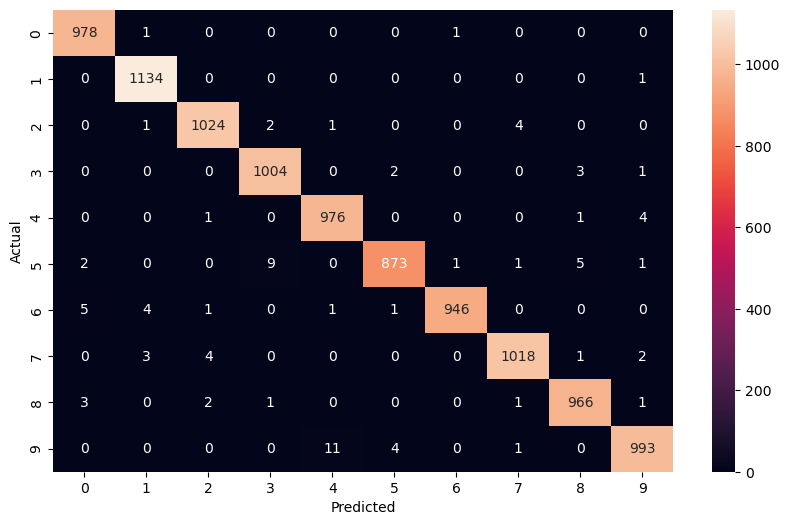

In [48]:
plt.figure(figsize = (10,6))
sns.heatmap(cmatrix, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

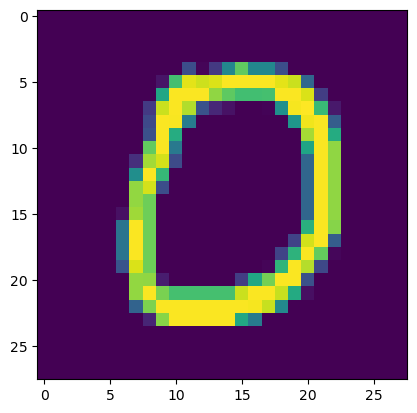

In [49]:
plt.imshow(X_test[10])

In [50]:
np.argmax(y_predicted[10])

0

### RandomForest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

In [52]:
mnist = fetch_openml("mnist_784", version = 1)
X, y = mnist["data"], mnist["target"]

In [53]:
X = X / 255.0

In [54]:
X_train, y_train = X[:50000], y[:50000]
X_val, y_val = X[50000:60000], y[50000:60000]
X_test, y_test = X[60000:], y[60000:]

In [55]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 10, max_features = 28)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=28)

In [57]:
y_pred = rf.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)
print("Validation accuracy:", val_acc)

Validation accuracy: 0.952


In [58]:
y_pred = rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_acc)

Test accuracy: 0.9477
